In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# 데이터 불러오기
df = pd.read_excel('서울대기오염_2019.xlsx')

# 컬럼 정리
df.columns = ['날짜', '측정소명', '미세먼지', '초미세먼지', '오존', '이산화질소', '일산화탄소', '아황산가스']

# 날짜 정제
df = df[pd.to_datetime(df['날짜'], errors='coerce').notnull()]
df['날짜'] = pd.to_datetime(df['날짜'])

# 결측치 평균으로 대체
df.fillna(df.mean(numeric_only=True), inplace=True)


/tmp/ipykernel_20951/3461381212.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = df[pd.to_datetime(df['날짜'], errors='coerce').notnull()]


In [4]:
# 평균 시계열 추출
pm_series = df[df['측정소명'] == '평균'].groupby('날짜')['미세먼지'].mean()

# 정상성 확인 (ADF test)
result = adfuller(pm_series)
print("ADF p-value:", result[1])


ADF p-value: 0.01326704121621125


In [ ]:
# ARIMA(1,1,1) 모델 학습
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(pm_series, order=(1,1,1))
model_fit = model.fit()

# 예측 생성
forecast = model_fit.forecast(steps=7)
forecast


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2020-01-01    30.716697
2020-01-02    33.691843
2020-01-03    35.568473
2020-01-04    36.752193
2020-01-05    37.498847
2020-01-06    37.969813
2020-01-07    38.266884
Freq: D, Name: predicted_mean, dtype: float64

findfont: Font family 'Malgun Gothic' not found.


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserW

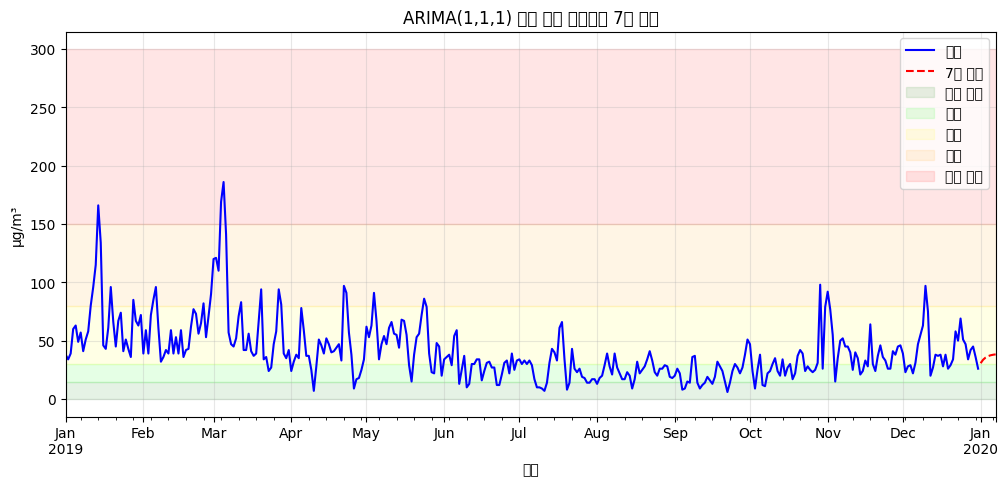

In [8]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'   # Windows

plt.figure(figsize=(12, 5))
pm_series.plot(label='실측', color='blue')
forecast.plot(label='7일 예측', color='red', linestyle='--')
plt.title('ARIMA(1,1,1) 기반 평균 미세먼지 7일 예측')
plt.xlabel('날짜')
plt.ylabel('μg/m³')

# 등급별 구간 색깔 채우기
plt.axhspan(0, 15, color='green', alpha=0.1, label='매우 좋음')
plt.axhspan(15, 30, color='lime', alpha=0.1, label='좋음')
plt.axhspan(30, 80, color='yellow', alpha=0.1, label='보통')
plt.axhspan(80, 150, color='orange', alpha=0.1, label='나쁨')
plt.axhspan(150, 300, color='red', alpha=0.1, label='매우 나쁨')

plt.legend()
plt.grid(alpha=0.3)
plt.show()
